#  Telecom Customer Churn Prediction. 


<img src="https://storage.googleapis.com/kaggle-datasets-images/2321135/3907949/b0bdc9ae114288b030a4c2a74ae4a939/dataset-cover.png?t=2022-07-09-07-22-29"/>

## Import necessary packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
# Reading dataset.
df = pd.read_csv('customer-churn-cleaned.csv')
df.head()

,Gender,Age,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,9,mising,Yes,No,Yes,Cable,No,No,Yes,Yes,No,No,Yes,One Year,Credit Card,65.6,0.00,0,381.51,974.81,Stayed,mising,mising
1,Male,46,9,mising,Yes,Yes,Yes,Cable,No,No,No,No,Yes,Yes,No,Month-to-Month,Credit Card,-4.0,38.33,10,96.21,610.28,Stayed,mising,mising
2,Male,50,4,Offer E,Yes,No,Yes,Fiber Optic,No,Yes,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,73.9,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,13,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Bank Withdrawal,98.0,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,3,mising,Yes,No,Yes,Fiber Optic,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Credit Card,83.9,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
print('The data consist of '+str(df.shape[0])+ ' rows and '+str(df.shape[1])+' columns')

The data consist of 6589 rows and 25 columns


## DATA PREPROCESSING.

In [5]:
df = df.drop(['Offer', 'Churn Category', 'Churn Reason'], axis=1)

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer


In [7]:
binary_cols = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Music', 'Streaming Movies',
               'Unlimited Data']
binary_dict = {'No':0, 'Yes':1, 'mising':9}

internet_type_dict = {'Cable': 0, 'DSL': 1, 'Fiber Optic': 2, 'mising':9}
contract_dict = {'Month-to-Month': 0, 'One Year':1, 'Two Year':2}
payment_dict = {'Bank Withdrawal':0, 'Credit Card':1, 'Mailed Check':2}
status_dict = {'Stayed':0, 'Churned':1}
gender_dict = {'Female':0, 'Male':1}

# catcols = df.select_dtypes('categoty')

for col in binary_cols:
    df[col] = df[col].map(binary_dict).astype('int32')
    # df[col] = df[col]

df['Internet Type'] = df['Internet Type'].map(internet_type_dict).astype('int32')
df['Gender'] = df['Gender'].map(gender_dict).astype('int32')
df['Contract'] = df['Contract'].map(contract_dict).astype('int32')
df['Payment Method'] = df['Payment Method'].map(payment_dict).astype('int32')
df['Customer Status'] = df['Customer Status'].map(status_dict).astype('int32')

In [8]:
imputer = KNNImputer(n_neighbors=5, missing_values=9, weights='distance')
data = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [9]:
def bin_age(x):
    age_list = []
    for row in x:
        if row <=30:
            age_list.append('Young Adult')
        elif (row > 30) & (row <= 60):
            age_list.append('Old Adult')
        elif row > 60:
            age_list.append('Old')
    x = age_list
    return x

In [10]:
data['Age'] = bin_age(data['Age'])

age_dict = {'Young Adult': 0, 'Old Adult': 1, 'Old':2}
data['Age'] = data['Age'].map(age_dict).astype('int32')

for col in binary_cols+['Age', 'Internet Type', 'Gender', 'Contract', 'Payment Method', 'Customer Status']:
    data[col] = data[col].astype('int32')


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,6589.0,0.502656,0.500031,0.00,0.00,1.00,1.00,1.00
Age,6589.0,1.026559,0.676875,0.00,1.00,1.00,1.00,2.00
Tenure in Months,6589.0,34.520175,23.950005,1.00,12.00,32.00,57.00,72.00
Phone Service,6589.0,0.902261,0.296983,0.00,1.00,1.00,1.00,1.00
Multiple Lines,6589.0,0.446046,0.497118,0.00,0.00,0.00,1.00,1.00
Internet Service,6589.0,0.796024,0.402982,0.00,1.00,1.00,1.00,1.00
Internet Type,6589.0,1.168614,0.833030,0.00,0.00,1.00,2.00,2.00
Online Security,6589.0,0.299438,0.458047,0.00,0.00,0.00,1.00,1.00
Device Protection Plan,6589.0,0.362726,0.480823,0.00,0.00,0.00,1.00,1.00
Premium Tech Support,6589.0,0.303536,0.459820,0.00,0.00,0.00,1.00,1.00


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
def show_importance(model_attr):
    try:
        imps = model_attr
    except AttributeError:
        imps = model.coef_
    imp_dict = {}
    for x,y in zip(x_valid.columns, imps):
        imp_dict[x] = y
    imp_df = pd.DataFrame(data=imp_dict, index=['Importance']).T
    plt.figure(figsize=(20,8))
    sns.barplot(data=imp_df, x=imp_df.index, y='Importance')
    plt.xticks(rotation=85)
    plt.title("FEATURE IMPORTANCES TO PREDICTOR.")
    plot = plt.show()
    return plot

In [14]:
data.to_csv('customer-churn-processed.csv', index=False)

## MODELLING..

* Split data into train and validation using train-test-split with stratification.
* import model evaluation metrics such classification reportand f1-score
* Train different algorithms with pipeline such as: Logostic Regression, decision tree, RandomForest.
* Ploting decision of tree based models.
* check each model feature importances of the outstanding model.

In [15]:
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']
trainx, validx, trainy, validy = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23, shuffle=True)


In [16]:
trainy.shape

(5271,)

### LOGISTIC REGRESSION.

In [17]:
logistic_pipe = Pipeline([('scaler', StandardScaler()), 
                               ('logistic', LogisticRegression(max_iter=10000, random_state=23, C=0.8, tol=0.1, class_weight={0:0.3, 1:0.7}))])

logistic_pipe.fit(trainx, trainy)
print(F'Trainig score: {logistic_pipe.score(trainx, trainy)}')
print(F'Vaidation score: {logistic_pipe.score(validx, validy)}')
print(F'Vaidation F1 score: {f1_score(logistic_pipe.predict(validx), validy)}')


Trainig score: 0.7852399924113072
Vaidation score: 0.798937784522003
Vaidation F1 score: 0.7025813692480358


In [18]:
parameters = {'logistic__tol': [0.01, 0.02, 0.03, 0.04, 0.05, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4],
              'logistic__solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
              }
clf = GridSearchCV(logistic_pipe, parameters, cv=2, scoring='roc_auc')

clf.fit(trainx, trainy)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(C=0.8,
                                                           class_weight={0: 0.3,
                                                                         1: 0.7},
                                                           max_iter=10000,
                                                           random_state=23,
                                                           tol=0.1))]),
             param_grid={'logistic__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                              'saga'],
                         'logistic__tol': [0.01, 0.02, 0.03, 0.04, 0.05, 0.05,
                                           0.06, 0.07, 0.08, 0.09, 0.1, 0.2,
                                           0.3, 0.4]},
             scoring='roc_auc')

In [19]:
print(clf.best_score_)
print(clf.best_params_)
# pd.DataFrame(clf.cv_results_)

0.8749367807190574
{'logistic__solver': 'lbfgs', 'logistic__tol': 0.04}


In [20]:
clf = clf.best_estimator_
clf.fit(trainx, trainy)
clf_pred = clf.decision_function(validx)


ROC AUC Score: 0.8918641801867124


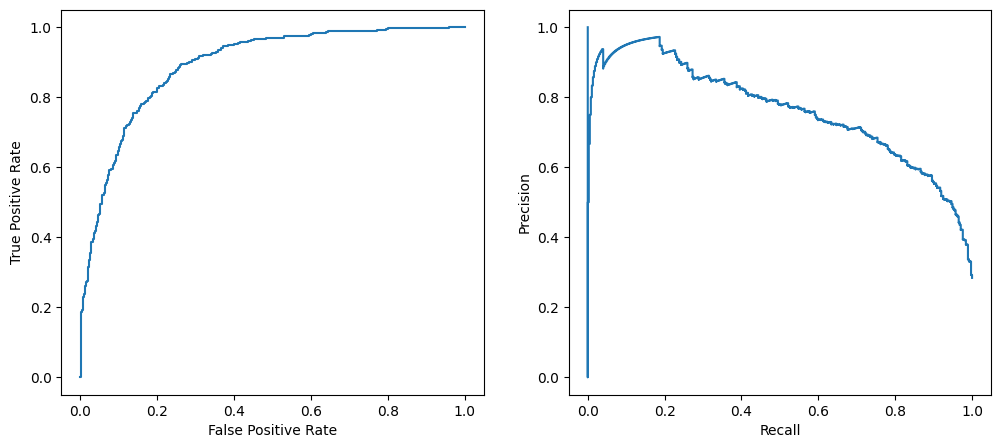

In [21]:
fpr, tpr, _= roc_curve(validy, clf_pred, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

prec, rec, _= precision_recall_curve(validy, clf_pred, pos_label=1)
pr_display = PrecisionRecallDisplay(prec, rec)

print(F'ROC AUC Score: {roc_auc_score(validy, clf_pred)}')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [22]:
print(classification_report(validy, clf.predict(validx)))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       944
           1       0.60      0.84      0.70       374

    accuracy                           0.80      1318
   macro avg       0.76      0.81      0.77      1318
weighted avg       0.83      0.80      0.81      1318



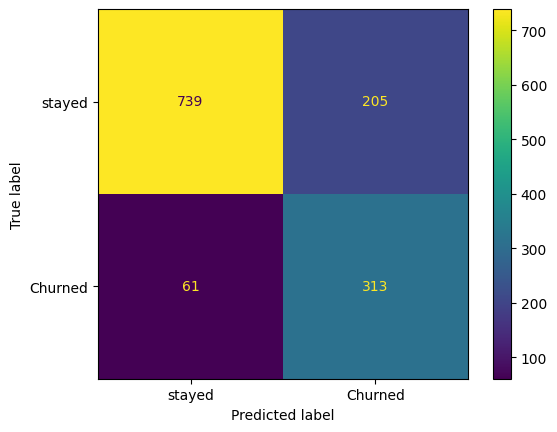

In [23]:
cm = confusion_matrix(validy, clf.predict(validx), labels=[0,1])
dist = ConfusionMatrixDisplay(cm, display_labels=['stayed', 'Churned'])
dist.plot()
plt.show()

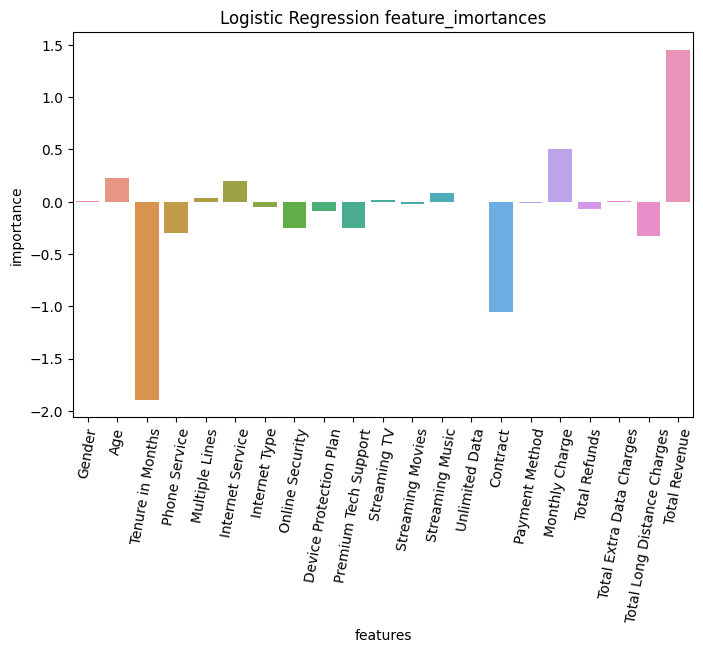

In [24]:
importances = pd.DataFrame({'importance':clf['logistic'].coef_[0], 'features':trainx.columns})
# importances.bar()
plt.figure(figsize=(8,5))
sns.barplot(data=importances, x='features', y='importance')
plt.xticks(rotation=80)
plt.title('Logistic Regression feature_imortances')
plt.show()

### DECISION TREE

In [25]:
lr = DecisionTreeClassifier(random_state=23, max_depth=7, criterion='gini', max_features=1.0, class_weight={0:0.3, 1:0.7})
lr.fit(trainx, trainy)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=7,
                       max_features=1.0, random_state=23)

In [26]:
lr_pred = lr.predict(validx)
print(f'F1 score : {f1_score(validy, lr_pred)}')
print(f'ROC AUC Score : {roc_auc_score(validy, lr_pred)}')

F1 score : 0.7114914425427872
ROC AUC Score : 0.8079992975618598


In [27]:
print(classification_report(validy, lr.predict(validx), labels=[0,1], target_names=['stayed', 'churned']))

              precision    recall  f1-score   support

      stayed       0.91      0.84      0.87       944
     churned       0.66      0.78      0.71       374

    accuracy                           0.82      1318
   macro avg       0.78      0.81      0.79      1318
weighted avg       0.83      0.82      0.83      1318



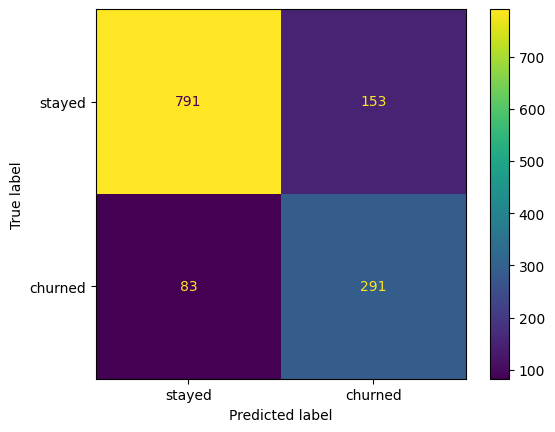

In [28]:
cm = confusion_matrix(validy, lr.predict(validx), labels=lr.classes_)
dist = ConfusionMatrixDisplay(cm, display_labels=['stayed', 'churned'])
dist.plot()
plt.show()

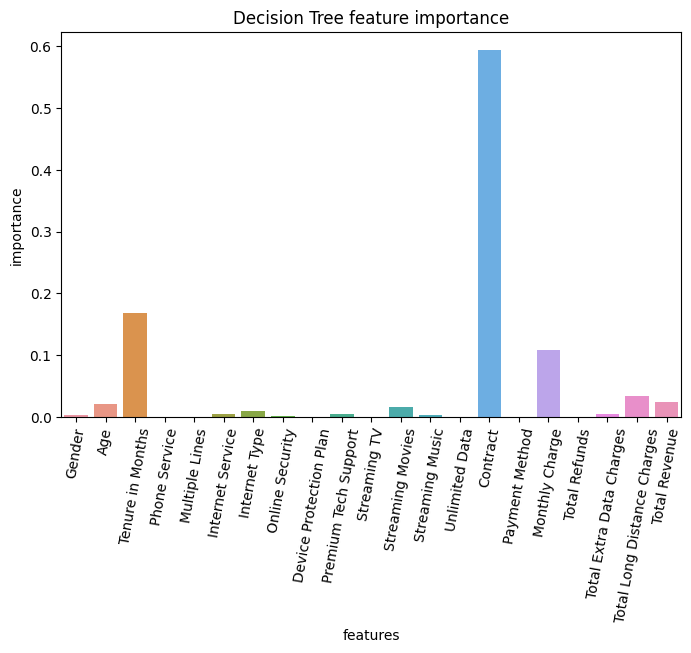

In [29]:
importances = pd.DataFrame({'importance':lr.feature_importances_, 'features':trainx.columns})
# importances.bar()
plt.figure(figsize=(8,5))
sns.barplot(data=importances, x='features', y='importance')
plt.xticks(rotation=80)
plt.title('Decision Tree feature importance')
plt.show()

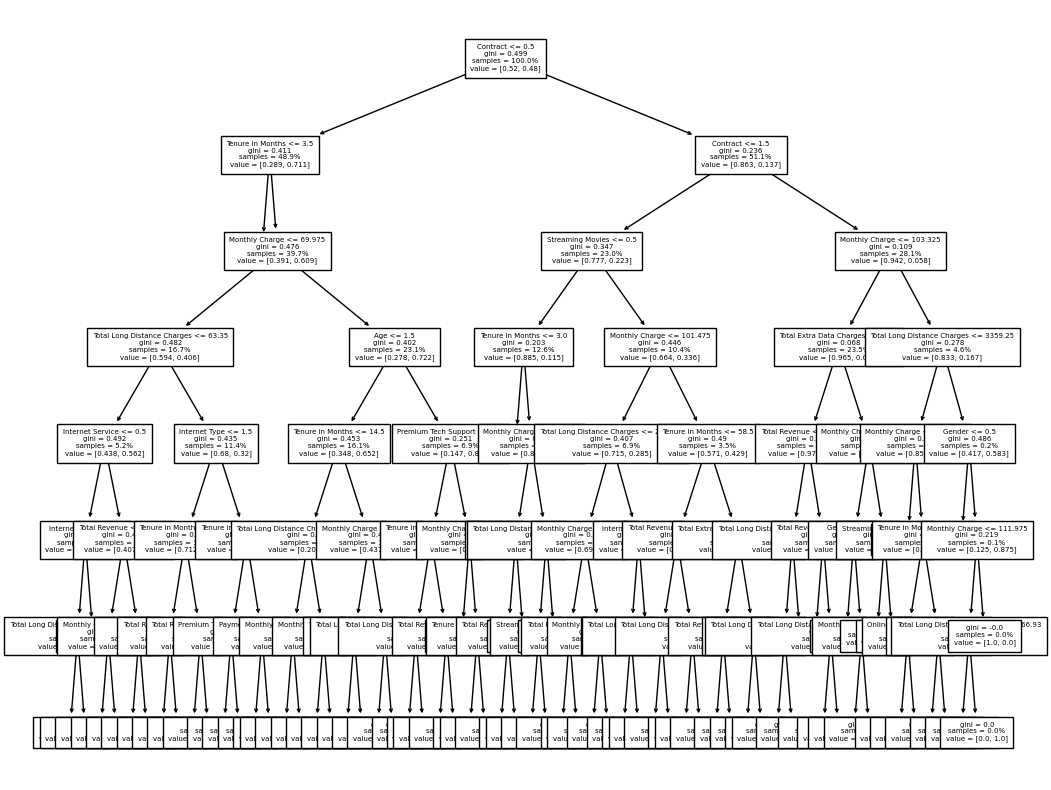

In [30]:
from sklearn import tree
plt.figure(figsize=(12, 10))
tree.plot_tree(lr, feature_names=trainx.columns, proportion=True, fontsize=5)
plt.show()

### Random Forest Classifier

In [31]:
rf = RandomForestClassifier(n_estimators=900, random_state=2022, warm_start=True, n_jobs=-1, criterion='gini',
                           class_weight={0:0.3, 1:0.7}, max_depth=8, max_features=0.6, )
rf.fit(trainx, trainy)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=8,
                       max_features=0.6, n_estimators=900, n_jobs=-1,
                       random_state=2022, warm_start=True)

In [32]:
rf_pred = rf.predict(validx)
print(f'F1 score : {f1_score(validy, rf_pred)}')
print(f'ROC AUC Score : {roc_auc_score(validy, rf_pred)}')

F1 score : 0.7323943661971832
ROC AUC Score : 0.8182639581256231


In [33]:
print(classification_report(validy, rf_pred, labels=[0,1], target_names=['stayed', 'Churned']))

              precision    recall  f1-score   support

      stayed       0.90      0.87      0.89       944
     Churned       0.70      0.76      0.73       374

    accuracy                           0.84      1318
   macro avg       0.80      0.82      0.81      1318
weighted avg       0.85      0.84      0.84      1318



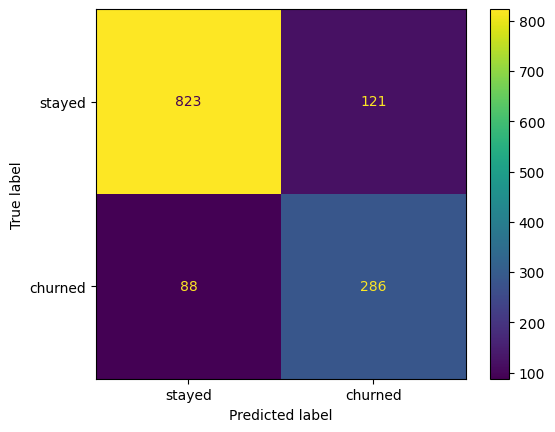

In [34]:
cm = confusion_matrix(validy, rf_pred, labels=rf.classes_)
dist = ConfusionMatrixDisplay(cm,  display_labels=['stayed', 'churned'])
dist.plot()
plt.show()

In [35]:

# plt.figure(figsize=(12, 10))
# tree.plot_tree(rf, feature_names=trainx.columns, proportion=True, fontsize=5)
# plt.show()

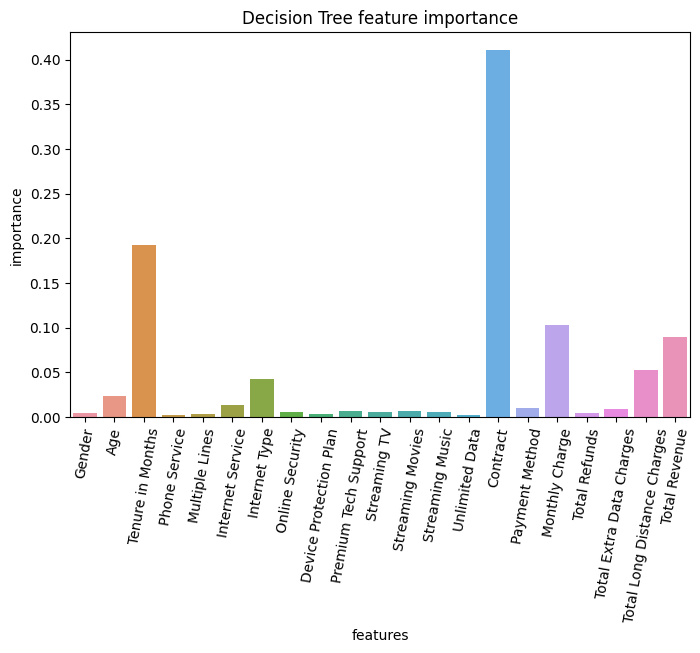

In [36]:
# show_importance(rf.feature_importances_)
importances = pd.DataFrame({'importance':rf.feature_importances_, 'features':trainx.columns})
# importances.bar()
plt.figure(figsize=(8,5))
sns.barplot(data=importances, x='features', y='importance')
plt.xticks(rotation=80)
plt.title('Decision Tree feature importance')
plt.show()

## Conclusion:

In oder to predict if a customer will churn or not, the feature importances from the trained models shows the rank features that contribute to the classification.

The most features are:

* Contract
* Monthly Charge
* Tenure in months
* Number of referrals
* Number of dependence
* Tech premium support
* Total renue
* Online security
* Internet type
* Age
* offer.